In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
from os.path import join as join
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

     
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc
import _ressources.analysis_tools.analysis as an
import _ressources.network as net

from scipy.optimize import curve_fit

#main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/osmotic'
main_dir = '/Volumes/LaCie/chain_lumen/_data/osmotic/'

try :
    os.path.isdir(main_dir)
except :
    print('main_dir not found !')

In [2]:
def lin(x, a, b) :
    return a*x+b

def fit_coeff(func, x_dat, y_dat) :
    x_dat_log, y_dat_log = x_dat, y_dat
    popt, pcov = curve_fit(func, x_dat_log, y_dat_log)
    return popt#, pcov

def average_powerlaw(a_list, k_list) :
    a_avg = np.average(a_list)
    k_avg = np.exp(np.average(k_list))
    return a_avg, k_avg

def calc_mu(theta) :
    return np.sin(theta)**2 / (2*theta - np.sin(2*theta))

def calc_chi(theta, gamma, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*gamma*kappa / (ell0*L0**3)
    #return gamma*kappa / (ell0*L0**3)

def calc_chi(theta, eps, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*eps*kappa / (ell0*L0**3)
    #return mu*np.sin(theta)*eps / (L0*ell0**3)


def lin(x, a, b) :
    return a*x+b

def fit_lin(t, N) :
    x, y = np.log(t), np.log(N)
    popt, pcov = curve_fit(lin, x, y)
    alpha, kappa = popt[0], np.exp(popt[1])
    alpha_std, kappa_std = pcov[0, 0], np.exp(pcov[1, 1])
    return kappa, alpha#, kappa_std, alpha_std
    

In [3]:
def import_osmotic(chis, chiv, path_list, plot_param_list, Nt_list, rescale = False, scatter=False, tau=1., L0=1., ell0=10.) :
    global mu, eps
    xiv = ell0*chiv
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    
    label = False
    Nt_list[(chis, chiv)] = {}
    for n in range(nsim) :
        if chis==500 and chiv==50 : 
            n+=20
        Nt_list[(chis, chiv)][n] = np.loadtxt(os.path.join(path_list[(chis, chiv)][n], 'sim_nlum.dat'))
    return Nt_list[(chis, chiv)]

def make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir) :
    pathdict[(chis, chiv)] = {}
    for n in range(nsim) :
        subsubdir = 'chiv' + str(chiv) + '_chis' + str(chis)
        pathdict[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    #return pathdict
    

In [4]:
mu = net.calc_muj_list(theta_list=np.pi/3.)
eps = 1e-3


## N(0) = 1000

In [5]:
ms = 5
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#780096', '+', ms, lw, alpha], 
                   (50, 5) : ['#FF36B8', '+', ms, lw, alpha], 
                   (500, 5) : ['#FF0700', '+', ms, lw, alpha], 
                   (5, 50) : ['#62FFFF', '+', ms, lw, alpha], 
                   (50, 50) : ['#009BFF', 'o', ms, lw, alpha], 
                   (500, 50) : ['#0000FF', '+', ms, lw, alpha], 
                   (5, 500) : ['#D9E34C', '+', ms, lw, alpha], 
                   (50, 500) : ['#63DB00', '+', ms, lw, alpha], 
                   (500, 500) : ['#00B400', '+', ms, lw, alpha]
                   }

In [6]:
#subdir = 'N1000/ell10/old_version'
subdir = 'N1000/ell10/'
nsim=20

path_list_N1000 = {}

pathdict = path_list_N1000

# ========================================================================================
# ===============================  chis = 5.   ===========================================
# ========================================================================================

# chis = 5, chiv = 5
chis = 5
chiv = 5
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)

#for n in range(nsim) :
#    subsubdir = 'chis' + str(chis) + '_chiv' + str(chiv)
#    path_list_N1000[(chis, chiv)][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# chis = 5, chiv = 50
chis = 5
chiv = 50
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# chis = 5, chiv = 50
chis = 5
chiv = 500
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# ========================================================================================
# ===============================  chis = 50.  ===========================================
# ========================================================================================
    
# chis = 50, chiv = 5
chis = 50
chiv = 5
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# chis = 50, chiv = 50
chis = 50
chiv = 50
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)

# chis = 50, chiv = 500
chis = 50
chiv = 500
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# ========================================================================================
# ===============================  chis = 500.  ==========================================
# ========================================================================================

# chis = 500, chiv = 5
chis = 500
chiv = 5
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    
# chis = 500, chiv = 50
chis = 500
chiv = 50
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)

# chis = 500, chiv = 500
chis = 500
chiv = 500
make_path_dict(nsim, chis, chiv, pathdict, main_dir, subdir)
    

In [12]:
Nt_list_N1000 = {}

#plt.figure(figsize=(8, 8))

rescale = True
scatter = False

#plt.xscale('log')
#plt.yscale('log')

# ========================================================================================
# ===============================  chiv = 5.  ============================================
# ========================================================================================

chiv5_chis5 = 1
if chiv5_chis5 :
    chis = 5
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 5, chis 5) imported !')
    
chiv5_chis50 = 0
if chiv5_chis50 :
    chis = 50
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 5, chis 50) imported !')
    
    
chiv5_chis500 = 0
if chiv5_chis500 :
    chis = 500
    chiv = 5
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N100, rescale = rescale, scatter=scatter)
    print('(chiv 5, chis 500) imported !')
    
# ========================================================================================
# ===============================  chiv = 50.  ===========================================
# ========================================================================================

chiv50_chis5 = 1
if chiv50_chis5 :
    chis = 5
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 50, chis 5) imported !')
    
chiv50_chis50 = 1
if chiv50_chis50 :
    chis = 50
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 50, chis 50) imported !')
    
chiv50_chis500 = 0
if chiv50_chis500 :
    chis = 500
    chiv = 50
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 50, chis 500) imported !')
    
# ========================================================================================
# ===============================  chiv = 500.  ==========================================
# ========================================================================================

chiv500_chis5 = 1
if chiv500_chis5 :
    chis = 5
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 500, chis 5) imported !')
    
chiv500_chis50 = 1
if chiv500_chis50 :
    chis = 50
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 500, chis 50) imported !')
    
chiv500_chis500 = 1
if chiv500_chis500 :
    chis = 500
    chiv = 500
    Nt_list_N1000[(chis, chiv)] = import_osmotic(chis, chiv, path_list_N1000, plot_param_list, Nt_list_N1000, rescale = rescale, scatter=scatter)
    print('(chiv 500, chis 500) imported !')
    

(chiv 5, chis 5) imported !
(chiv 50, chis 5) imported !
(chiv 50, chis 50) imported !
(chiv 500, chis 5) imported !
(chiv 500, chis 50) imported !
(chiv 500, chis 500) imported !


In [33]:
def gen_log_times(tmin, tmax, npts) :
    return np.logspace(np.log10(tmin), np.log10(tmax), npts)

def find_argmins(Nt, log_times) :
    index_array = np.zeros(len(log_times), dtype=int)
    for k in range(len(log_times)) :
        index_array[k] = np.argmin(np.abs(log_times[k]-Nt[:, 0]))
    return index_array

def gen_index_array(Nt, npts) :
    size = len(Nt)
    
    tmin = np.min(Nt[1:, 0])   # skip the first time since t=0
    tmax = np.max(Nt[1:, 0])   # skip the first time since t=0
    
    log_times = gen_log_times(tmin, tmax, npts)
    index_array = find_argmins(Nt, log_times)
    
    return index_array

def plot_conf(chis, chiv, Nt, wmin=-6, wmax=3, rescaled=False, ell0=10, L0=1, tau=1, show_sim=False, ax=None) :
    xiv = ell0*chiv
    T = (2*tau*L0*ell0)/((xiv**2)*mu*eps)
    if show_sim :
        for n in range(nsim) :
            index_array = gen_index_array(Nt[(chis, chiv)][n], npts)
            if rescaled :
                if ax != None :
                    ax.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
                else :
                    plt.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
            else :
                if ax != None :
                    ax.plot(Nt[(chis, chiv)][n][index_array, 0]/T, Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)
                else :
                    plt.plot(Nt[(chis, chiv)][n][index_array, 0], Nt[(chis, chiv)][n][index_array, 1], color = plot_param_list[(chis, chiv)][0], alpha = 0.1)

    res_avg, res_std = an.batch(data_dict=Nt[(chis, chiv)], wmin=wmin, wmax=wmax, nwindow=npts)
    if rescaled :
        if ax != None :
            ax.plot(res_avg[:, 0]/T, res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
        else :
            plt.plot(res_avg[:, 0]/T, res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    else :
        if ax != None :
            ax.plot(res_avg[:, 0], res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
        else :
            plt.plot(res_avg[:, 0], res_avg[:, 1], marker=plot_param_list[(chis, chiv)][1], color = plot_param_list[(chis, chiv)][0], markersize=plot_param_list[(chis, chiv)][2], linewidth=plot_param_list[(chis, chiv)][3], linestyle=plot_param_list[(chis, chiv)][5], label = r'$\chi_v = '+str(chiv)+' ; \chi_s = '+str(chis)+'$')
    
    #N0=1000      
    #Tf = T*N0**(5./2)
    #plt.vlines(x=1/Tf, ymin=1., ymax=N0, linestyle = '--', color=plot_param_list[(chis, chiv)][0])


In [34]:
ms = 8
lw = 1
alpha=1

plot_param_list = {(5, 5) : ['#E54367', 's', ms, lw, alpha, '-.'], 
                   (50, 5) : ['#CC6677', '*', ms+2, lw, alpha, 'dotted'],
                   (500, 5) : ['#666633', 'o', ms, lw, alpha, '--'], 
                   (5, 50) : ['#33BBEE', 'P', ms, lw, alpha, '--'], 
                   (50, 50) : ['#8DD800', 'o', ms, lw, alpha, '-.'], 
                   (500, 50) : ['#FF8900', '^', ms, lw, alpha, 'dotted'], 
                   (5, 500) : ['#1433E4', 'D', ms, lw, alpha, '-.'], 
                   (50, 500) : ['#FFD425', 'H', ms, lw, alpha, '--'], 
                   (500, 500) : ['#E90000', '<', ms, lw, alpha, 'dotted']
                   }

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


End of import !


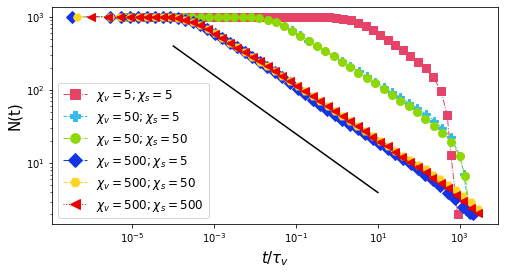

In [35]:
#plt.figure(figsize=(8, 8))
plt.figure(figsize=(8, 4))
plt.xscale('log')
plt.yscale('log')

show_sim = False
rescaled = False
savefig = 0#True

npts = 50
nsim = 20

chiv5 = True
if chiv5 :
    # ===================
    chiv, chis = 5, 5
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

    # ===================
    #chiv, chis = 5, 50
    #plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

    # ===================
    #chiv, chis = 5, 500
    #plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

chiv50 = True
if chiv50 :
    # ===================
    chiv, chis = 50, 5
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)
    
    # ===================
    chiv, chis = 50, 50
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=4, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)
    
    # ===================
    #chiv, chis = 50, 500
    #plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

chiv500 = True
if chiv500 :
    # ===================
    chiv, chis = 500, 5
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

    # ===================
    chiv, chis = 500, 50
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

    # ===================
    chiv, chis = 500, 500
    plot_conf(chis, chiv, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False)

lines = False#True
if lines :
    #chiv = 5
    #plt.vlines(x=(chiv/2.)**(5/2.), ymin=1, ymax = 1e3, linestyle='--')
    #Nc = 2*1000/chiv
    #plt.hlines(xmin=1e-1, xmax=1e2, y=Nc, linestyle='--', color='k')

    chiv_c = 1.5
    chiv=50
    plt.vlines(x=(chiv/chiv_c)**(5/2.), ymin=1, ymax = 1e3, linestyle='-.')
    Nc = chiv_c*1000/chiv
    plt.hlines(xmin=1, xmax=1e6, y=Nc, linestyle='-.', color='k')

    chiv=500
    plt.vlines(x=1000**(5/2.), ymin=1,  ymax=1e3, linestyle='dotted')


plt.legend(fontsize=12, loc=3, markerscale=1.2)
#plt.grid()

if rescaled :
    plt.xlabel(r'$t/T_v$', fontsize=15)
else :
    plt.xlabel(r'$t/\tau_v$', fontsize=15)
    
plt.ylabel('N(t)', fontsize=15)

if rescaled :
    k, a = 300, -0.4
    t = np.logspace(0.5, 5, 101)
    #plt.plot(t, k*t**a, color = 'k')
    if savefig :
        plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening_rescaled.eps', format='eps')
else :
    k, a = 10, -0.4
    t = np.logspace(-4, 1, 101)
    plt.plot(t, k*t**a, color = 'k')
    if savefig :
        plt.savefig('/Users/mathieuleverge/git/chain_lumen/_notebook/figures/HO_coarsening.eps', format='eps')


    
plt.show()
    

# Distribution

In [36]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg



def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    #for k in [30] :
    for k in range(nsim) :
        k+=20
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        for k in range(nsim) :
        #for k in [30] :
            k+=20
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def calc_distrib(time, folder, area = False) :
    global mu
    dat = {}
    for elem in os.listdir(folder) :
        if elem.startswith('run') :
            #print(elem, ' imported', end='\r')
            tdat = np.loadtxt(os.path.join(folder, elem, 'distrib_length.dat'), usecols=0)
            step = np.argmin(np.abs(tdat-time))
            Ldat = np.genfromtxt(os.path.join(folder, elem, 'distrib_length.dat'), skip_header=step, skip_footer=len(tdat)-step-1)
            dat[int(elem[-4:])] = [step, Ldat]
    
    new_L = np.concatenate([dat[k][1][1:] for k in dat.keys()])
    bins = np.max([10, 10+int(np.log10(len(new_L)))*7])
    
    if area :
        new_A = new_L**2 / mu
        y, x = np.histogram(new_A, bins=bins, weights=np.ones_like(new_A)/len(new_A))
    else :
        y, x = np.histogram(new_L, bins=bins, weights=np.ones_like(new_L)/len(new_L))
    x = 0.5*(x[1:]+x[:-1])
    distrib = [x, y]
    return distrib



In [37]:
def find_tstep(time_list, t0) :
    return np.argmin(np.abs(time_list - t0))

def calc_avg_distrib(X_dict, Y_dict) :
    X_array = np.array([X_dict[k] for k in X_dict.keys()])
    X_avg = np.average(X_array, axis=0)

    Y_array = np.array([Y_dict[k] for k in Y_dict.keys()])
    Y_avg = np.average(Y_array, axis=0)
    return X_avg, Y_avg



def make_T_dict(folder, npts, nsim=20, log_tmin=-3, log_tmax=7) :
    time_plot_list = np.logspace(log_tmin, log_tmax, npts)
    T_dict = {}
    #for k in [30] :
    for k in range(nsim) :
        k+=20
        T_dict[k] = np.loadtxt(os.path.join(folder, 'run'+str(k).zfill(4)+'/distrib_length.dat'), usecols=0)
    return T_dict, time_plot_list

def make_step_dict(T_dict, time_plot_list, npts, nsim) :
    step_dict = {}
    for n in range(npts) :
        step_dict[n] = {}
        for k in range(nsim) :
        #for k in [30] :
            k+=20
            step_dict[n][k] = np.argmin(np.abs(T_dict[k] - time_plot_list[n]))
    return step_dict

def calc_distrib(time, folder, area = False) :
    global mu
    dat = {}
    for elem in os.listdir(folder) :
        if elem.startswith('run') :
            #print(elem, ' imported', end='\r')
            tdat = np.loadtxt(os.path.join(folder, elem, 'distrib_length.dat'), usecols=0)
            step = np.argmin(np.abs(tdat-time))
            Ldat = np.genfromtxt(os.path.join(folder, elem, 'distrib_length.dat'), skip_header=step, skip_footer=len(tdat)-step-1)
            dat[int(elem[-4:])] = [step, Ldat]
    
    new_L = np.concatenate([dat[k][1][1:] for k in dat.keys()])
    bins = np.max([10, 10+int(np.log10(len(new_L)))*5])
    
    if area :
        new_A = new_L**2 / mu
        weights = np.ones_like(new_A)/len(new_A)
        #weights = np.ones_like(new_A)
        y, x = np.histogram(new_A, bins=bins, weights=weights)
    else :
        y, x = np.histogram(new_L, bins=bins, weights=np.ones_like(new_L)/len(new_L))
        
    x = 0.5*(x[1:]+x[:-1])
    distrib = [x, y]
    return distrib




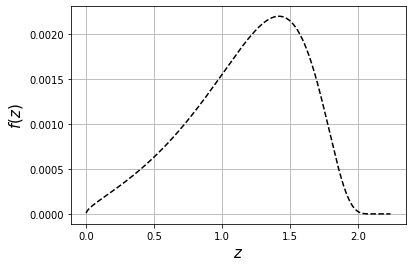

In [38]:
# LENGTHS
def h(z, C=-4, zmax=2.) :
    return (3+C/(z**2))/(C*(1/z - 1.) - z)

def calc_fz1(z, dz, z0=1e-6) :    
    sol = [z0]
    for i in range(1, len(z)) :
        sol += [sol[i-1] + dz*h(z[i-1])*sol[i-1]]
    
    Z = np.sum(sol)
    sol = np.array(sol) / Z
    return sol

# AREAS    
def g(z, C=27./10, zmax=9./4) :
    return (5*C - 8*z**(3./2))/(4*z**(5./2) + 10*C*z*(1-np.sqrt(z)))

def calc_fz2(z, dz, z0=1e-6) :    
    sol2 = [z0]
    for i in range(1, len(z)) :
        sol2 += [sol2[i-1] + dz*g(z[i-1])*sol2[i-1]]
    
    Z = np.sum(sol2)
    sol2 = np.array(sol2) / Z
    return sol2

z = np.linspace(0.001, 9./4.-1e-2, 1000)
dz = z[1]-z[0]
#sol = calc_fz1(z, dz)
sol2 = calc_fz2(z, dz)
gamma = 0.846#1./np.sum(z*sol)

#plt.plot(z, sol, color='k')
plt.plot(z, sol2, color='k', linestyle='--')
plt.grid()
plt.xlabel(r'$z$', fontsize=15)
plt.ylabel(r'$f(z)$', fontsize=15)
#plt.savefig('/Users/mathieuleverge/Dropbox/M.Leverge/Lumen/Hydro-osmotic coarsening/Theory/figures/chap_hydraulic/self_similar_distribution.eps', format='eps')
plt.show()


In [39]:

NT_p = {}
#chis, chiv = 50, 50
chis, chiv = 5, 500
NT_p = {}

folder = os.path.join(main_dir, 'N1000', 'ell10', 'chiv'+str(chiv)+'_chis'+str(chis)+'_initial_gaussian' )

for n in range(100) :
    filename = os.path.join(folder, 'run'+str(n).zfill(4), 'sim_nlum.dat')
    NT_p[n] = np.loadtxt(filename)

    

In [40]:
tauv = 1.
L0 = 1.
xiv = 5000
theta = np.pi/3.
mu = np.sin(theta)**2 / (2*theta - np.sin(2*theta))
eps = 1e-3
gamma = 0.846

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/analysis.py:147: RuntimeWarning: Mean of empty slice
  tavg = np.nanmean([Lavg[j][0] for j in range(len(Lavg))])
/Users/mathieuleverge/git/chain_lumen/_ressources/analysis_tools/ana

End of import !


/usr/local/lib/python3.8/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/usr/local/lib/python3.8/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


End of import !


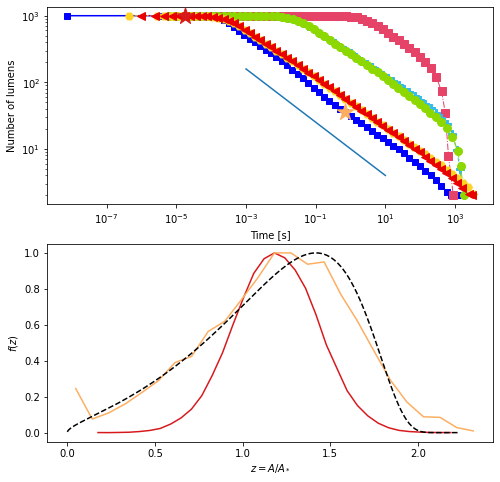

In [52]:

npts = 60

#steps = [10, 20, 27, 30]
steps = [5, 35]
col_steps = {steps[0] : '#d7191c', 
             steps[1] : '#fdae61', 
             #steps[2] : '#abdda4', 
             #steps[3] : '#2b83ba', 
             #steps[4] : '#F27FBE',
            }

fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].set_xscale('log')
ax[0].set_yscale('log')

show_sim = False

#for ca in ['1e-2', '1e-1', '1e0', '1e1'] :

wmin, wmax = -6, 3
#T = (2*tauv*L0**2)/((xiv**2)*mu*eps)
T=1

index_array = gen_index_array(NT_p[0], npts)
res_avg, res_std = an.batch(data_dict=NT_p, wmin=wmin, wmax=wmax, nwindow=npts)

ax[0].plot(res_avg[:, 0]/T, res_avg[:, 1], marker='s', color = 'blue')


#
plot_conf(chiv=5, chis=5, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False, ax=ax[0])
plot_conf(chiv=50, chis=5, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False, ax=ax[0])
plot_conf(chiv=50, chis=50, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False, ax=ax[0])
#plot_conf(chiv=500, chis=5, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False, ax=ax[0])
plot_conf(chiv=500, chis=50, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False, ax=ax[0])
plot_conf(chiv=500, chis=500, Nt=Nt_list_N1000, wmin=-6, wmax=3, rescaled=rescaled, ell0=10, L0=1, tau=1, show_sim=False, ax=ax[0])


clear = 0
if clear :
    for elem in os.listdir(folder) :
        if elem.endswith('.txt') :
            print(elem)
            os.remove(join(folder, elem))

for s in steps :
#for s in steps[1:] :
    ax[0].scatter(res_avg[s, 0]/T, res_avg[s, 1], color=col_steps[s], zorder=10, marker='*', s=300)
    
    if os.path.isfile(join(folder, 'Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_step'+str(s)+'.txt')) :
        distrib = np.loadtxt(join(folder, 'Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_step'+str(s)+'.txt'))
    else :
        #print('Calculating distribution at step ', s, end='\r')
        distrib = calc_distrib(time = res_avg[s, 0], folder=folder, area=True)
        np.savetxt(join(folder, 'Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'_step'+str(s)+'.txt'), distrib)
    
    ax[1].plot(distrib[0]/(gamma*np.average(distrib[0])), distrib[1]/np.max(distrib[1]), label='t = ' +"{:2.2e}".format(res_avg[s, 0]), color=col_steps[s])
    
    #yerrbar = np.sqrt(distrib[1])
    #ax[1].errorbar(distrib[0]/(gamma*np.average(distrib[0])), distrib[1]/np.max(distrib[1]), yerr=yerrbar/np.max(distrib[1]), label='t = ' +"{:2.2e}".format(res_avg[s, 0]), color=col_steps[s])
    if show_sim :
        for k in NT_p.keys() :
            ax[0].plot(NT_p[k][:, 0]/T, NT_p[k][:, 1], color='blue', alpha=0.1)
            
np.savetxt(join(folder, 'Nt_avg_chiv'+str(chiv)+'_chis'+str(chis)+'.txt'), res_avg)

ax[1].plot(z, sol2/np.max(sol2), color='k', linestyle='--')

ax[0].plot()
#ax[1].legend()

ax[0].set_xlabel('Time [s]')
ax[0].set_ylabel('Number of lumens')

ax[1].set_xlabel(r'$z = A / A_*$')
ax[1].set_ylabel(r'$f(z)$')

k, a = 10., -2./5
t = np.logspace(-3, 1, 101)
ax[0].plot(t, k*t**a)
#ax[0].legend(loc=3)

plt.savefig('/Users/mathieuleverge/Documents/cavidoc/hydroosmotic/coarsening_withdistrib.eps', format='eps')

plt.show()


In [24]:
folder

'/Volumes/LaCie/chain_lumen/_data/osmotic/N1000/ell10/chiv500_chis5_initial_gaussian'